In [56]:
from pandas.io.json import json_normalize
import os
from dotenv import load_dotenv
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

load_dotenv()

token = os.getenv("API_KEY")

In [28]:
pga_df= pd.read_csv('./input/PGA_Data_Historical.csv')
pga_df.head()

,Player Name,Season,Statistic,Variable,Value
0,Robert Garrigus,2010,Driving Distance,Driving Distance - (ROUNDS),71
1,Bubba Watson,2010,Driving Distance,Driving Distance - (ROUNDS),77
2,Dustin Johnson,2010,Driving Distance,Driving Distance - (ROUNDS),83
3,Brett Wetterich,2010,Driving Distance,Driving Distance - (ROUNDS),54
4,J.B. Holmes,2010,Driving Distance,Driving Distance - (ROUNDS),100


In [29]:
#estadisticas que contiene 
pga_df.Statistic.unique()


array(['Driving Distance', 'Driving Accuracy Percentage',
       'Greens in Regulation Percentage', 'Putting Average',
       'Par Breakers', 'Total Eagles', 'Total Birdies',
       'Scoring Average (Actual)', 'Money Leaders', 'Sand Save Percentage',
       'Par 3 Birdie or Better Leaders', 'Par 4 Birdie or Better Leaders',
       'Par 5 Birdie or Better Leaders',
       'Birdie or Better Conversion Percentage', 'Putts Per Round',
       'Scoring Average', 'All-Around Ranking', 'Total Driving',
       'Scrambling', 'Ryder Cup Points', 'PGA Championship Points',
       'Putts made Distance', 'Top 10 Finishes', 'Non-member Earnings',
       'Par 3 Scoring Average', 'Par 4 Scoring Average',
       'Par 5 Scoring Average', "3-Putt Avoidance - 15-20'",
       "3-Putt Avoidance - 20-25'", "3-Putt Avoidance > 25'",
       'Current Par or Better Streak', "Rounds in the 60's",
       'Money per Event Leaders', 'Eagles (Holes per)', 'Birdie Average',
       'World Money List', 'Ball Striking', '

In [30]:
pga_df = pga_df.set_index(['Player Name','Variable','Season'])['Value'].unstack('Variable').reset_index()
pga_df.head()

Variable,Player Name,Season,% of Potential Pts won - FedExCup Playoffs - (# OF TOP 10'S),% of Potential Pts won - FedExCup Playoffs - (# OF WINS),% of Potential Pts won - FedExCup Playoffs - (%),% of Potential Pts won - FedExCup Playoffs - (EVENTS),% of Potential Pts won - FedExCup Playoffs - (PLAYOFF POINTS WON),% of Potential Pts won - FedExCup Playoffs - (POTENTIAL PTS),% of Potential Pts won - FedExCup Regular Season - (# OF TOP 10'S),% of Potential Pts won - FedExCup Regular Season - (# OF WINS),...,Total Money (Official and Unofficial) - (EVENTS),Total Money (Official and Unofficial) - (MONEY),Total Putting - (EVENTS),Total Putting - (TOTAL),Victory Leaders - (EVENTS),Victory Leaders - (VICTORIES),World Golf Ranking Points - (EVENTS),World Golf Ranking Points - (POINTS),World Money List - (EVENTS),World Money List - (MONEY)
0,A.J. McInerney,2018,None,None,None,None,None,None,None,None,...,4,"$164,923",None,None,4,NaN,None,None,None,None
1,Aaron Baddeley,2010,NaN,NaN,1.55,26,78,"5,000",1,NaN,...,26,"879,317",26,92.4,26,NaN,26,30,27,"879,317"
2,Aaron Baddeley,2011,1,NaN,12.78,22,"1,278","10,000",4,1,...,24,"$3,157,193",22,106.8,22,1,22,155,26,"$3,321,105"
3,Aaron Baddeley,2012,NaN,NaN,2.70,22,135,"5,000",3,NaN,...,22,"$1,215,753",22,116.2,22,NaN,22,66,None,None
4,Aaron Baddeley,2013,NaN,NaN,5.00,24,125,"2,500",2,NaN,...,24,"$721,024",24,106.1,24,NaN,24,31,None,None


In [31]:
#asigno las columnas que me interesan al df
col = [ "Player Name",
        "Season",
        "Top 10 Finishes - (TOP 10)",
        "Top 10 Finishes - (EVENTS)",
        "Scoring Average (Actual) - (AVG)",
        "Total Money (Official and Unofficial) - (MONEY)"]
pga_df=pga_df[col]
pga_df

Variable,Player Name,Season,Top 10 Finishes - (TOP 10),Top 10 Finishes - (EVENTS),Scoring Average (Actual) - (AVG),Total Money (Official and Unofficial) - (MONEY)
0,A.J. McInerney,2018,1,4,None,"$164,923"
1,Aaron Baddeley,2010,2,26,70.61,"879,317"
2,Aaron Baddeley,2011,5,22,70.22,"$3,157,193"
3,Aaron Baddeley,2012,3,22,71.56,"$1,215,753"
4,Aaron Baddeley,2013,2,24,71.58,"$721,024"
5,Aaron Baddeley,2014,2,24,71.14,"$942,559"
6,Aaron Baddeley,2015,1,25,70.76,"$439,925"
7,Aaron Baddeley,2016,5,28,70.53,"$1,644,915"
8,Aaron Baddeley,2017,2,20,71.40,"$755,356"
9,Aaron Baddeley,2018,1,27,70.74,"$725,928"


In [32]:
#limpio columna Money
pga_df = pga_df.replace({'\$':'',',':''},regex = True)
pga_df.head()

Variable,Player Name,Season,Top 10 Finishes - (TOP 10),Top 10 Finishes - (EVENTS),Scoring Average (Actual) - (AVG),Total Money (Official and Unofficial) - (MONEY)
0,A.J. McInerney,2018,1,4,None,164923
1,Aaron Baddeley,2010,2,26,70.61,879317
2,Aaron Baddeley,2011,5,22,70.22,3157193
3,Aaron Baddeley,2012,3,22,71.56,1215753
4,Aaron Baddeley,2013,2,24,71.58,721024


In [33]:
#renombro las columnas y las paso a tipo float
pga_df.rename(columns={'Player Name':'PlayerName',
                       'Top 10 Finishes - (TOP 10)':'Top_10', 
                       'Top 10 Finishes - (EVENTS)':'Events',
                       'Scoring Average (Actual) - (AVG)':'Avg',
                       'Total Money (Official and Unofficial) - (MONEY)':'Money'}, 
                        inplace = True)
for col in  pga_df.columns[2:]:
   pga_df[col] = pga_df[col].astype(float)
pga_df.info()
pga_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11223 entries, 0 to 11222
Data columns (total 6 columns):
PlayerName    11223 non-null object
Season        11223 non-null int64
Top_10        1649 non-null float64
Events        1649 non-null float64
Avg           1678 non-null float64
Money         3681 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 526.2+ KB


Variable,PlayerName,Season,Top_10,Events,Avg,Money
0,A.J. McInerney,2018,1.0,4.0,NaN,164923.0
1,Aaron Baddeley,2010,2.0,26.0,70.61,879317.0
2,Aaron Baddeley,2011,5.0,22.0,70.22,3157193.0
3,Aaron Baddeley,2012,3.0,22.0,71.56,1215753.0
4,Aaron Baddeley,2013,2.0,24.0,71.58,721024.0


In [34]:
#creo una columna nueva con la media de top_10 y los torneos jugados
pga_df['media_Top10'] = pga_df['Top_10']/pga_df['Events']
pga_df.head()

Variable,PlayerName,Season,Top_10,Events,Avg,Money,media_Top10
0,A.J. McInerney,2018,1.0,4.0,NaN,164923.0,0.250000
1,Aaron Baddeley,2010,2.0,26.0,70.61,879317.0,0.076923
2,Aaron Baddeley,2011,5.0,22.0,70.22,3157193.0,0.227273
3,Aaron Baddeley,2012,3.0,22.0,71.56,1215753.0,0.136364
4,Aaron Baddeley,2013,2.0,24.0,71.58,721024.0,0.083333


In [35]:
algo = pga_df[pga_df['PlayerName']=='Aaron Baddeley']
algo[algo['Season']==2018]

Variable,PlayerName,Season,Top_10,Events,Avg,Money,media_Top10
9,Aaron Baddeley,2018,1.0,27.0,70.74,725928.0,0.037037


In [36]:
#separo PlayerName en 2 columnas nuevas
pga_df['first_name'], pga_df['last_name'] = pga_df['PlayerName'].str.split(' ', 1).str 
pga_df.head()

Variable,PlayerName,Season,Top_10,Events,Avg,Money,media_Top10,first_name,last_name
0,A.J. McInerney,2018,1.0,4.0,NaN,164923.0,0.250000,A.J.,McInerney
1,Aaron Baddeley,2010,2.0,26.0,70.61,879317.0,0.076923,Aaron,Baddeley
2,Aaron Baddeley,2011,5.0,22.0,70.22,3157193.0,0.227273,Aaron,Baddeley
3,Aaron Baddeley,2012,3.0,22.0,71.56,1215753.0,0.136364,Aaron,Baddeley
4,Aaron Baddeley,2013,2.0,24.0,71.58,721024.0,0.083333,Aaron,Baddeley


In [37]:
#borro la columna PlayerName
pga_df.drop(['PlayerName'], axis='columns', inplace=True)


In [38]:
pga_df.head()

Variable,Season,Top_10,Events,Avg,Money,media_Top10,first_name,last_name
0,2018,1.0,4.0,NaN,164923.0,0.250000,A.J.,McInerney
1,2010,2.0,26.0,70.61,879317.0,0.076923,Aaron,Baddeley
2,2011,5.0,22.0,70.22,3157193.0,0.227273,Aaron,Baddeley
3,2012,3.0,22.0,71.56,1215753.0,0.136364,Aaron,Baddeley
4,2013,2.0,24.0,71.58,721024.0,0.083333,Aaron,Baddeley


In [39]:
#coloco las columnas
cols = ['first_name','last_name','Season','Top_10','Events','Avg','Money','media_Top10']

pga_df = pga_df[cols]
pga_df.head()

Variable,first_name,last_name,Season,Top_10,Events,Avg,Money,media_Top10
0,A.J.,McInerney,2018,1.0,4.0,NaN,164923.0,0.250000
1,Aaron,Baddeley,2010,2.0,26.0,70.61,879317.0,0.076923
2,Aaron,Baddeley,2011,5.0,22.0,70.22,3157193.0,0.227273
3,Aaron,Baddeley,2012,3.0,22.0,71.56,1215753.0,0.136364
4,Aaron,Baddeley,2013,2.0,24.0,71.58,721024.0,0.083333


API

In [40]:
#voy a importar el API
def requestsportradar(year):
    token = os.getenv("API_KEY")
    if not token:
        raise ValueError("You must set a sportradar token")
    
    baseUrl = "https://api.sportradar.us/golf"
    endpoint = f"-t2/players/wgr/{year}/rankings.json"
    url = baseUrl+endpoint
    print(f"Requesting data from {url}")
    params = {
        "api_key": f"{token}"
    }
    res = requests.get(url,params=params)
    print(res)
    if res.status_code != 200:
        print(res.text)
        raise ValueError("Bad Response")
    return res.json()

In [41]:
api=requestsportradar(2018)
api

Requesting data from https://api.sportradar.us/golf-t2/players/wgr/2018/rankings.json
<Response [200]>


{'alias': 'WGR',
 'id': '7770fd4f-5b61-43df-bffc-c7ad471364cb',
 'name': 'World Golf Ranking',
 'players': [{'country': 'UNITED STATES',
   'first_name': 'Brooks',
   'id': 'f555d8b6-f0af-4cce-aa5b-de981d89bc69',
   'last_name': 'Koepka',
   'prior_rank': 1,
   'rank': 1,
   'statistics': {'avg_points': 9.62,
    'events_played': 43,
    'points': 413.87,
    'points_gained': 368.32,
    'points_lost': -251.89}},
  {'country': 'ENGLAND',
   'first_name': 'Justin',
   'id': 'c11235f6-0f62-4afb-93e7-952dc0554649',
   'last_name': 'Rose',
   'prior_rank': 2,
   'rank': 2,
   'statistics': {'avg_points': 9.61,
    'events_played': 48,
    'points': 461.26,
    'points_gained': 390.35,
    'points_lost': -281.8}},
  {'country': 'UNITED STATES',
   'first_name': 'Dustin',
   'id': 'a7041051-eb25-40b9-acb3-dab88cae69c0',
   'last_name': 'Johnson',
   'prior_rank': 3,
   'rank': 3,
   'statistics': {'avg_points': 8.24,
    'events_played': 44,
    'points': 362.42,
    'points_gained': 346.85,

In [42]:
result = json_normalize(api, ['players'])
result.head(4)

,country,first_name,id,last_name,prior_rank,rank,statistics
0,UNITED STATES,Brooks,f555d8b6-f0af-4cce-aa5b-de981d89bc69,Koepka,1,1,"{'events_played': 43, 'avg_points': 9.62, 'poi..."
1,ENGLAND,Justin,c11235f6-0f62-4afb-93e7-952dc0554649,Rose,2,2,"{'events_played': 48, 'avg_points': 9.61, 'poi..."
2,UNITED STATES,Dustin,a7041051-eb25-40b9-acb3-dab88cae69c0,Johnson,3,3,"{'events_played': 44, 'avg_points': 8.24, 'poi..."
3,UNITED STATES,Justin,2094fa02-6411-48df-a717-aa1a7228d645,Thomas,4,4,"{'events_played': 48, 'avg_points': 7.87, 'poi..."


In [43]:
#asigno las columnas que me interesan al df
col = [ "first_name",
        "last_name",
        "rank",
        "country" ]
result=result[col]
result.head(4)

,first_name,last_name,rank,country
0,Brooks,Koepka,1,UNITED STATES
1,Justin,Rose,2,ENGLAND
2,Dustin,Johnson,3,UNITED STATES
3,Justin,Thomas,4,UNITED STATES


Union de los 2 data

In [44]:
data=pd.merge(pga_df, result, on='first_name', how='outer')
data.head(4)

,first_name,last_name_x,Season,Top_10,Events,Avg,Money,media_Top10,last_name_y,rank,country
0,A.J.,McInerney,2018.0,1.0,4.0,NaN,164923.0,0.250000,NaN,NaN,NaN
1,Aaron,Baddeley,2010.0,2.0,26.0,70.61,879317.0,0.076923,Wise,51.0,UNITED STATES
2,Aaron,Baddeley,2010.0,2.0,26.0,70.61,879317.0,0.076923,Rai,118.0,ENGLAND
3,Aaron,Baddeley,2011.0,5.0,22.0,70.22,3157193.0,0.227273,Wise,51.0,UNITED STATES


plots

In [45]:
rank = data.sort_values('rank')
rank=rank.replace(to_replace ="last_name_x", value ="last_name") 
rank.head(4)

,first_name,last_name_x,Season,Top_10,Events,Avg,Money,media_Top10,last_name_y,rank,country
1989,Brooks,Blackburn,2017.0,NaN,NaN,NaN,NaN,NaN,Koepka,1.0,UNITED STATES
1990,Brooks,Koepka,2012.0,NaN,NaN,NaN,NaN,NaN,Koepka,1.0,UNITED STATES
1991,Brooks,Koepka,2013.0,NaN,NaN,NaN,14950.0,NaN,Koepka,1.0,UNITED STATES
1992,Brooks,Koepka,2014.0,2.0,16.0,70.23,1043115.0,0.125,Koepka,1.0,UNITED STATES


In [46]:
rank.to_csv('rank.csv', header=False, index=False)

In [47]:
pga_df.to_csv('pga_df.csv', header=False, index=False)

In [48]:
result.to_csv('result.csv', header=False, index=False)

In [49]:
rank.isnull().sum()

first_name         0
last_name_x       11
Season            11
Top_10         12088
Events         12088
Avg            12034
Money           9478
media_Top10    12088
last_name_y     6865
rank            6865
country         6865
dtype: int64

In [50]:
rank = rank.dropna(how='any')
rank.head(4)

,first_name,last_name_x,Season,Top_10,Events,Avg,Money,media_Top10,last_name_y,rank,country
1992,Brooks,Koepka,2014.0,2.0,16.0,70.23,1043115.0,0.125000,Koepka,1.0,UNITED STATES
1993,Brooks,Koepka,2015.0,8.0,23.0,69.95,3571900.0,0.347826,Koepka,1.0,UNITED STATES
1994,Brooks,Koepka,2016.0,7.0,21.0,70.13,3462393.0,0.333333,Koepka,1.0,UNITED STATES
1996,Brooks,Koepka,2018.0,6.0,17.0,69.39,7194047.0,0.352941,Koepka,1.0,UNITED STATES


In [57]:
money=rank[["Season","Money"]]
money.head(4)


,Season,Money
1992,2014.0,1043115.0
1993,2015.0,3571900.0
1994,2016.0,3462393.0
1996,2018.0,7194047.0


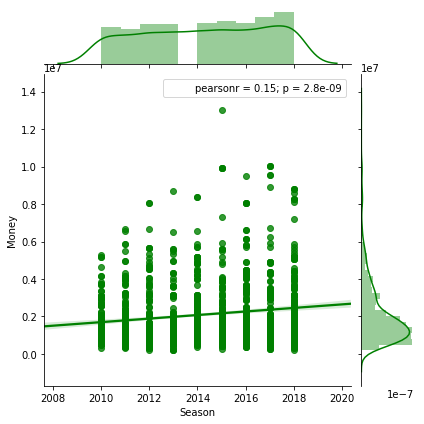

In [62]:
sn.jointplot(x='Season', y='Money', data=money, kind ='reg', ratio=5, color='green', space=0.2)